## Library Imports

Here are the libraries that I will use.

In [1]:
import patoolib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
#patoolib.extract_archive("Dataset.rar")

## Dataframe Operations

After unzipping the rar file, I read data.csv into a dataframe.

In [3]:
df = pd.read_csv('Dataset/data.csv', sep=";")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [4]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [5]:
print("Length of data is: " , len(df))

Length of data is:  9471


We can see that data is too noisy, it has to be processed.

<AxesSubplot:>

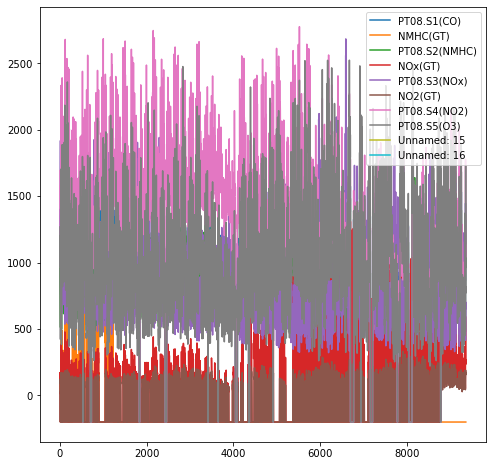

In [6]:
df.plot(figsize=(8, 8))

## Data Cleaning

Data is cleaned through processes such as filling in missing
values, smoothing the noisy data, identify outliers or resolving the
inconsistencies in the data.

Last 2 rows named Unnamed:15 and Unnamed:16 was fully NaN and inconsistent, so I dropped them.

In [7]:
df.drop(columns=df.columns[-2:], axis=1, inplace=True) 

In [8]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


Here are the NaN values of each column. When we look at the data we can see that last 114 rows are NaN

In [9]:
df.isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

As we can see in graph, all columns has exactly same number of NaN values. 

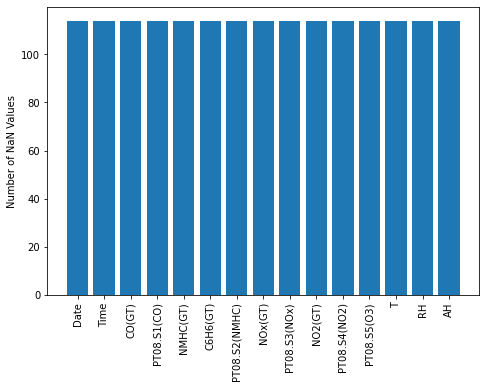

In [10]:
null_data = df.isnull().sum()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Number of NaN Values')
plt.xticks(rotation='vertical')
ax.bar(df.columns, null_data)
plt.show()

I dropped last 114 rows of data which are NaN values

In [11]:
df = df[:-114]

<AxesSubplot:>

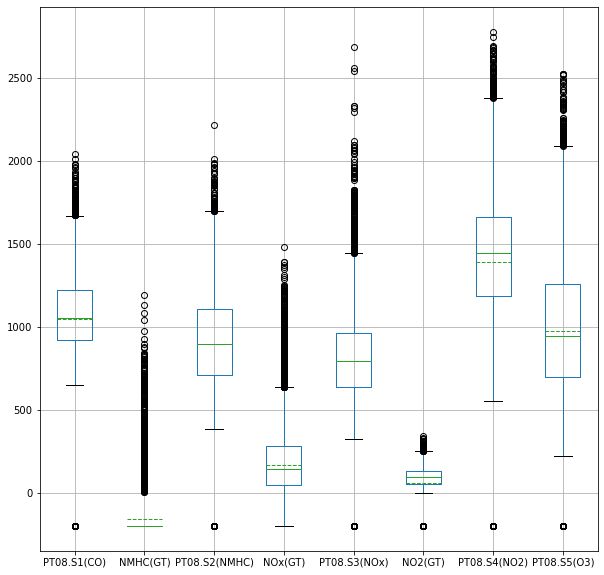

In [12]:
df.boxplot(meanline=True, showmeans=True, figsize=(10,10))

Date and Time columns are inconsistent and not float. I dropped them, too.

In [13]:
date_list = df["Date"]
time_list = df["Time"]
df.drop(columns=df.columns[:2], axis=1, inplace=True)

C:\Users\THINKPAD\anaconda3\envs\Mete\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Some decimal values are was wrong. I replaced commas with dots and numbers are fixed.

In [14]:
df = df.astype(str)
df = df.apply(lambda x: x.str.replace(',','.'))

And when we check NaN values again, we can see that I removed all of them.

In [15]:
df.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Statically detailed table with 'describe()' attribute of pandas library.

In [16]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357,9357,9357,9357,9357,9357,9357,9357,9357,9357,9357,9357
unique,104,1042,430,408,1246,926,1222,284,1604,1744,437,754,6684
top,-200,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200,-200,-200
freq,1592,366,8443,366,366,1639,366,1642,366,366,366,366,366


In [17]:
describe_df = pd.DataFrame(df.describe())

I converted all values to float to make numerical operations safely. 

In [18]:
df = df.astype('float')

In [19]:
type(df['CO(GT)'][0])

numpy.float64

### Finding and Filling Missing Values

The line below shows us that -200 (top value) occurences are high on dataset. This value is noise for our data. My plan is
removing the group that their rows all values are -200 which is 366 times shows up in our data. This 366 rows are not useful.

After this process, we can see that 366 rows are gone. 

In the continuation of the plan, I treated -200 values in other rows as NaN values. 

In [20]:
describe_df.iloc[-1]

CO(GT)           1592
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
Name: freq, dtype: object

In [21]:
df.drop(df.loc[df['PT08.S1(CO)'] == -200.0].index, inplace=True)

In [22]:
len(df)

8991

In [23]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


Here is the distrubition of values in each columns.

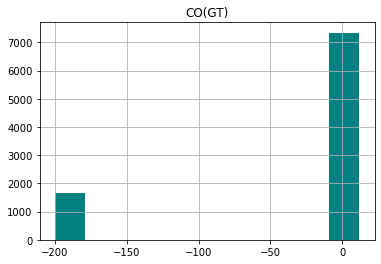

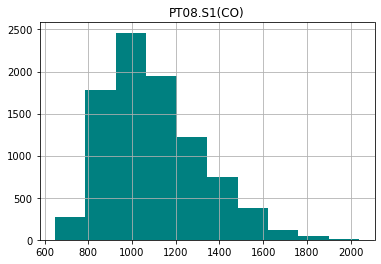

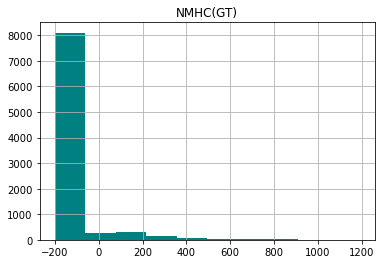

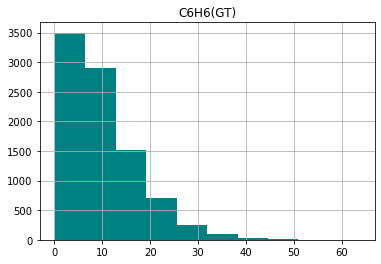

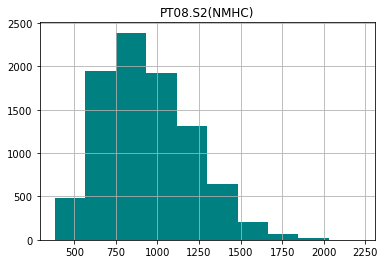

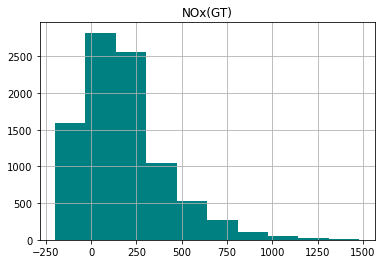

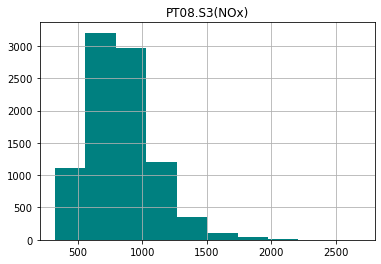

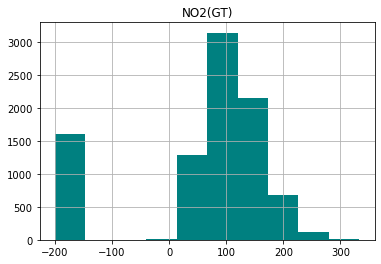

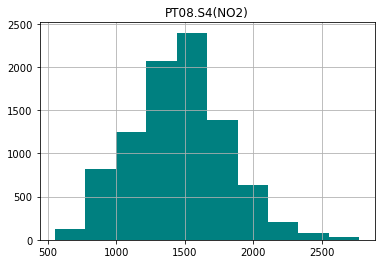

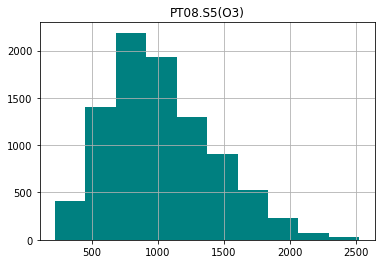

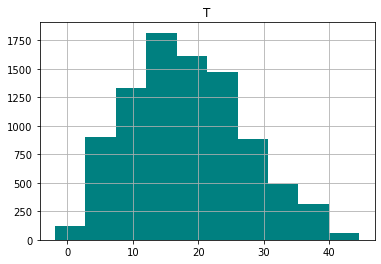

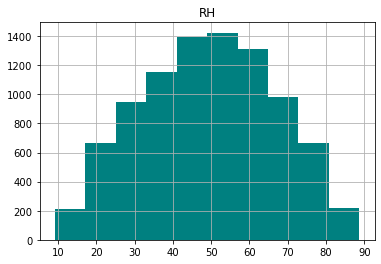

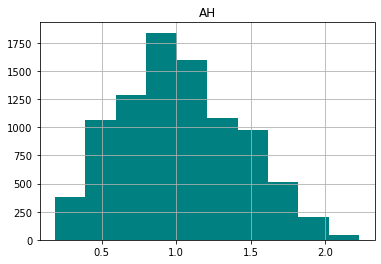

In [24]:
cols = df.columns
for i in range(0,len(cols)):
    df.hist(column=cols[i], color = 'teal')

In this part, I converted other -200 values to NaN values as I said above.

In [25]:
for m in range(len(cols)):
    df[cols[m]] = df[cols[m]].replace([-200.0], np.nan)

In [26]:
df.isna().sum()

CO(GT)           1647
PT08.S1(CO)         0
NMHC(GT)         8104
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)          1595
PT08.S3(NOx)        0
NO2(GT)          1598
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64

Now we have 4 critic columns:

NHMC(GT) --> Has 8104 NaN values, inconsistent and has to be removed.

CO(GT) --> Will be filled with column mean

NOx(GT) --> Will be filled with column mean

NO2(GT) --> Will be filled with column mean

In [27]:
df = df.drop('NMHC(GT)', axis=1)

In [28]:
mean1 =df['CO(GT)'].mean()
df['CO(GT)'].fillna(value=mean1, inplace=True)

mean2 =df['NOx(GT)'].mean()
df['NOx(GT)'].fillna(value=mean2, inplace=True)

mean3 =df['NO2(GT)'].mean()
df['NO2(GT)'].fillna(value=mean3, inplace=True)

### Clustering

Clustering is a set of techniques used to partition data into groups, or clusters. Clusters are loosely defined as groups of data objects that are more similar to other objects in their cluster than they are to data objects in other clusters.

Most efficient technique of clustering is KMeans, which I used in my work.

In [29]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=5, max_iter=50, random_state=1)
k_means.fit(df) 
labels = k_means.labels_

In [30]:
centroids = k_means.cluster_centers_
clustered = pd.DataFrame(centroids,columns=df.columns)

Now we have a dataframe with 5 clusters.

In [31]:
clustered

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.656597,1232.333333,14.565603,1129.770867,249.475943,686.919724,121.402905,1725.944710,1239.975545,22.844976,45.991707,1.200085
1,1.081660,869.943921,2.780099,628.231266,129.426432,1164.911166,81.219126,1107.457568,581.312655,14.014690,49.849231,0.810013
2,1.606585,1009.300239,7.208333,858.083732,143.534403,888.818581,90.700861,1511.035486,832.387959,23.263876,46.488636,1.238592
3,4.345615,1479.927782,23.807816,1389.124894,545.492651,518.063721,159.493022,1875.451997,1735.035684,17.497196,54.305777,1.089016
4,2.005339,1095.350355,8.196525,897.779433,315.912255,733.058865,142.610271,1147.632624,1108.825532,10.315319,53.330993,0.668684


### Detect & Remove Outliers

In this part, for outlier detection I used quantiles. 

My outlier band was values are not between %2 - %98 of data. I removed all values outside this area.

In [32]:
df_filtered = df
cols = df.columns
for i in range(0,len(cols)):
    q = df[cols[i]].quantile(0.98)
    df[df[cols[i]] < q]
    q_low = df[cols[i]].quantile(0.02)
    q_hi  = df[cols[i]].quantile(0.98)
    df_filtered = df_filtered[(df_filtered[cols[i]] < q_hi) & (df_filtered[cols[i]] > q_low)]

In [33]:
df_filtered.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


As we can see, my dataframe is smaller now without outliers.

In [34]:
len(df_filtered)

6839

## Data Transformation

### Normalization

Data normalization is just cleaning up the collected data so as to make it more clear and machine-readable. Often the data collected by different systems are in different formats, there may be duplicates, and there may be unnecessary data as well. And you won’t get good results or insights if you try to visualize or analyze the data. Messy or cluttered data is difficult to understand and data redundancy creates unnecessary storage costs.

In this part I used StandartScaler. It standardizes features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:
z = (x - u) / s

In [35]:
from sklearn import preprocessing

In [36]:
scaler = preprocessing.StandardScaler()
scaler.fit(df_filtered)

StandardScaler()

In [37]:
df_scaled = pd.DataFrame(scaler.transform(df_filtered), columns=df_filtered.columns)

Now we have filtered and normalized data.

In [38]:
df_scaled.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.568514,1.481871,0.387663,0.501891,-0.425745,1.214421,0.068584,0.759481,0.773888,-0.647711,-0.019095,-0.789958
1,-0.058443,1.098949,-0.045751,0.083102,-0.875043,1.814324,-0.532293,0.309939,-0.141816,-0.685462,-0.092708,-0.878313
2,0.150542,1.718381,-0.115097,0.009469,-0.675355,1.641470,0.097197,0.296419,0.173730,-0.861632,0.293761,-0.810747
3,0.150542,1.571970,-0.080424,0.050887,-0.382955,1.397442,0.326102,0.394439,0.572804,-0.974885,0.661826,-0.710903
4,-0.476415,0.986325,-0.548511,-0.464545,-0.675355,1.971925,0.154423,0.076718,0.285100,-0.949718,0.637288,-0.705159


### Aggregation

Data aggregation is any process whereby data is gathered and expressed in a summary form.

In [39]:
df_scaled.agg(['sum','max','min','mean'])

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
sum,-1.250555e-12,4.433787e-12,4.547474e-13,-1.989520e-13,9.094947e-13,-1.364242e-12,-1.136868e-12,0.000000,1.136868e-13,-1.136868e-12,3.183231e-12,-3.410605e-13
max,3.703299e+00,2.895302e+00,3.404223e+00,2.747703e+00,4.145676e+00,3.415760e+00,3.101578e+00,2.479909,2.930125e+00,2.384933e+00,1.962323e+00,2.257894e+00
min,-1.625836e+00,-1.823643e+00,-1.484685e+00,-1.987831e+00,-1.409920e+00,-1.932530e+00,-2.163242e+00,-2.275773,-1.957758e+00,-1.943821e+00,-1.994378e+00,-1.948973e+00
mean,-1.828564e-16,6.483092e-16,6.649325e-17,-2.909080e-17,1.329865e-16,-1.994798e-16,-1.662331e-16,0.000000,1.662331e-17,-1.662331e-16,4.654528e-16,-4.986994e-17


### Generalization

Data generalization is the process of creating a more broad categorization of data.

In this part, I grouped data as Reference, Nominal and Humidity which are the attribute of columns.

In [40]:
df_scaled.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')

In [41]:
list_of_reference = list(zip(df_scaled['CO(GT)'],df_scaled['C6H6(GT)'],df_scaled['NOx(GT)'],df_scaled['NO2(GT)'],))
list_of_nominal = list(zip(df_scaled['PT08.S1(CO)'], df_scaled['PT08.S2(NMHC)'],df_scaled['PT08.S3(NOx)'],df_scaled['PT08.S4(NO2)'],df_scaled['PT08.S5(O3)']))
list_of_humidity = list(zip(df_scaled['T'], df_scaled['RH'],df_scaled['AH']))

df_reference = pd.DataFrame(list_of_reference,columns=['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)'])
df_nominally = pd.DataFrame(list_of_nominal,columns=['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)'])
df_humidity = pd.DataFrame(list_of_humidity,columns=['T','RH','AH'])

As we can see, dataframe is now multiindex and has a hierarchy.

Reference --> CO(GT), C6H6(GT), NOx(GT), NO2(GT)

Nominal --> PT08.S1(CO), PT08.S2(NMHC), PT08.S3(NOx), PT08.S4(NO2), PT08.S5(O3)

Humidity --> T, RH, AH

In [42]:
general_df = pd.concat([df_reference, df_nominally, df_humidity], axis=1, keys=['Reference', 'Nominal', 'Humidity'])
general_df.head()

Reference                                   Nominal                \
     CO(GT)  C6H6(GT)   NOx(GT)   NO2(GT) PT08.S1(CO) PT08.S2(NMHC)   
0  0.568514  0.387663 -0.425745  0.068584    1.481871      0.501891   
1 -0.058443 -0.045751 -0.875043 -0.532293    1.098949      0.083102   
2  0.150542 -0.115097 -0.675355  0.097197    1.718381      0.009469   
3  0.150542 -0.080424 -0.382955  0.326102    1.571970      0.050887   
4 -0.476415 -0.548511 -0.675355  0.154423    0.986325     -0.464545   

                                         Humidity                      
  PT08.S3(NOx) PT08.S4(NO2) PT08.S5(O3)         T        RH        AH  
0     1.214421     0.759481    0.773888 -0.647711 -0.019095 -0.789958  
1     1.814324     0.309939   -0.141816 -0.685462 -0.092708 -0.878313  
2     1.641470     0.296419    0.173730 -0.861632  0.293761 -0.810747  
3     1.397442     0.394439    0.572804 -0.974885  0.661826 -0.710903  
4     1.971925     0.076718    0.285100 -0.949718  0.637288 -0.705159

In [43]:
general_df.columns

MultiIndex([('Reference',        'CO(GT)'),
            ('Reference',      'C6H6(GT)'),
            ('Reference',       'NOx(GT)'),
            ('Reference',       'NO2(GT)'),
            (  'Nominal',   'PT08.S1(CO)'),
            (  'Nominal', 'PT08.S2(NMHC)'),
            (  'Nominal',  'PT08.S3(NOx)'),
            (  'Nominal',  'PT08.S4(NO2)'),
            (  'Nominal',   'PT08.S5(O3)'),
            ( 'Humidity',             'T'),
            ( 'Humidity',            'RH'),
            ( 'Humidity',            'AH')],
           )

### Attribute Construction

Replacing or adding new attributes inferred by existing attributes. In this part, I found a new feature with multiply of Temperature and Relative Humidity columns.  

In [44]:
temp_based_relative_humidity = []
for i in range(len(general_df)):
    TBRH = (general_df['Humidity']['T'][i] * general_df['Humidity']['RH'][i]) / 100
    temp_based_relative_humidity.append(round(TBRH,2))

In [45]:
general_df['Humidity', 'TBRH'] = temp_based_relative_humidity
general_df.head()

Reference                                   Nominal                \
     CO(GT)  C6H6(GT)   NOx(GT)   NO2(GT) PT08.S1(CO) PT08.S2(NMHC)   
0  0.568514  0.387663 -0.425745  0.068584    1.481871      0.501891   
1 -0.058443 -0.045751 -0.875043 -0.532293    1.098949      0.083102   
2  0.150542 -0.115097 -0.675355  0.097197    1.718381      0.009469   
3  0.150542 -0.080424 -0.382955  0.326102    1.571970      0.050887   
4 -0.476415 -0.548511 -0.675355  0.154423    0.986325     -0.464545   

                                         Humidity                            
  PT08.S3(NOx) PT08.S4(NO2) PT08.S5(O3)         T        RH        AH  TBRH  
0     1.214421     0.759481    0.773888 -0.647711 -0.019095 -0.789958  0.00  
1     1.814324     0.309939   -0.141816 -0.685462 -0.092708 -0.878313  0.00  
2     1.641470     0.296419    0.173730 -0.861632  0.293761 -0.810747 -0.00  
3     1.397442     0.394439    0.572804 -0.974885  0.661826 -0.710903 -0.01  
4     1.971925     0.076718    0.285100 -0.949718  0.637288 -0.705159 -0.01

## Data Reduction

Data reduction is the process of reducing the amount of capacity required to store data. Data reduction can increase storage efficiency and reduce costs.

In this part I showed some methods of feature selection and data reduction. Unselected columns could be dropped for data reduction. 

I choosed CO(GT) as targeted column for calculating importance of features.

### Correlation Filtering

In [46]:
corr = df_scaled.corr()['CO(GT)']
corr

CO(GT)           1.000000
PT08.S1(CO)      0.741248
C6H6(GT)         0.803922
PT08.S2(NMHC)    0.796217
NOx(GT)          0.663018
PT08.S3(NOx)    -0.627961
NO2(GT)          0.592487
PT08.S4(NO2)     0.524741
PT08.S5(O3)      0.720157
T                0.070383
RH              -0.036314
AH               0.044223
Name: CO(GT), dtype: float64

<AxesSubplot:>

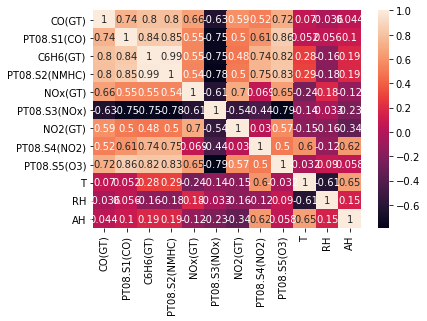

In [47]:
sns.heatmap(df_scaled.corr(method='pearson'),annot = True)

### Forward Selection Wrapper

In [48]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [49]:
X = df_scaled.drop(['CO(GT)'],axis=1)
y = df_scaled['CO(GT)']

In [50]:
sfs = SFS(LinearRegression(),k_features=5,forward=True,floating=False,scoring = 'r2',cv = 0)

In [51]:
sfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=(5, 5),
                          scoring='r2')

Here are the columns that have most effect on target column. 

In [52]:
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)",[0.6462905416717422],0.646291,"(C6H6(GT),)"
2,"(1, 3)",[0.7176824735967446],0.717682,"(C6H6(GT), NOx(GT))"
3,"(1, 3, 5)",[0.7258982341086405],0.725898,"(C6H6(GT), NOx(GT), NO2(GT))"
4,"(1, 3, 5, 6)",[0.7354522871574241],0.735452,"(C6H6(GT), NOx(GT), NO2(GT), PT08.S4(NO2))"
5,"(1, 3, 5, 6, 10)",[0.7443176140226566],0.744318,"(C6H6(GT), NOx(GT), NO2(GT), PT08.S4(NO2), AH)"


## Resources

--> https://www.javatpoint.com/data-preprocessing-machine-learning
    
--> https://mungingdata.com/apache-spark/aggregations/

--> https://www.geeksforgeeks.org

--> https://www.analyticsvidhya.com/blog/2021/08/data-preprocessing-in-data-mining-a-hands-on-guide/

--> https://www.stackoverflow.com